# MNIST Basic Approach (Softmax)
## Softmax establece como elegir, de las *n* salidas (como por ejemplo, dígitos), la única

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data #Permite descargar el dataset de MNIST

In [3]:
mnist = input_data.read_data_sets("./MNIST_data/", one_hot=True)

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.num_examples

55000

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.train.labels.shape

(55000, 10)

In [8]:
mnist.test.num_examples

10000

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
singl_image = mnist.train.images[101].reshape(28,28)

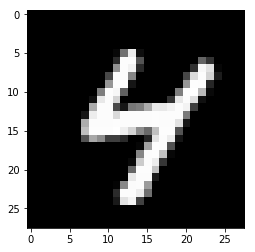

In [11]:
plt.imshow(singl_image, cmap='gist_gray')

In [12]:
singl_image.min()

0.0

In [13]:
singl_image.max()

1.0

In [14]:
type(singl_image)

numpy.ndarray

# Placeholders

In [15]:
x = tf.placeholder(tf.float32, shape=[None, 28*28])

# Variables 

In [16]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# Create Graph operations

In [17]:
y = tf.matmul(x, W) + b

# Loss Function

In [18]:
y_true = tf.placeholder(tf.float32, [None, 10])

In [19]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y)) #cross entropy loss

# Optimizer 

In [20]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [21]:
confusion = tf.confusion_matrix(labels=tf.argmax(y,1), predictions=tf.argmax(y_true,1), num_classes=10)

# Create session 

In [23]:
init = tf.global_variables_initializer()

import numpy as np

global N

In [24]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(200):#10000):
        
        batch_x, batch_y = mnist.train.next_batch(100) #Devuelve 100 ejemplos por cada paso
        
        sess.run(train, feed_dict = {x:batch_x, y_true:batch_y})
        
        #print(step)
        if step%100 == 0:
            correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
            acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

            print(sess.run(acc, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels}))

    # argmax devuelve el índice del mayor elemento
    # La salida de tf.equal es true / false
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_true, 1))
    
    #Naaa = correct_prediction.eval(session = sess)
        
    # Convertir de True, False a 1,0...
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc2 = tf.cast(correct_prediction, tf.float32)
    
    acc3 = tf.argmax(y,1)
    
    acc4 = [tf.argmax(y,1), tf.argmax(y_true,1)]
    #acc4 = tf.concat(,  axis=1)
    # Predicted data = [3,4] y la verdadera es [3,9] => Devolver Falso. Si [3,4 y [3,4] => True]
    # [ True, False ]
    # [1.0, 0.0]
    # 0.5
    
    # Devuelve la evaluación de acc con las entradas del feed_dict especificado
    print(sess.run(acc, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels}))
    
    #devuelve la evaluación de acc2 con las entradas del feed_dict especificado
    tst = sess.run(acc2, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels})
    
    tst2 = sess.run(acc4, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels})
    
#     print(sess.run(acc, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels}))

    confusion = tf.confusion_matrix(labels=tf.argmax(y,1), predictions=tf.argmax(y_true,1), num_classes=10, dtype=tf.float32)
    
    c_matrix = sess.run(confusion, feed_dict = {x:mnist.test.images, y_true:mnist.test.labels})
    
# print(c_matrix)
    
#     print(confusion.eval())

0.315
0.8918
0.9008


In [28]:
y_true.shape

TensorShape([Dimension(None), Dimension(10)])

In [26]:
y.dtype

tf.float32

In [91]:
import seaborn as sn

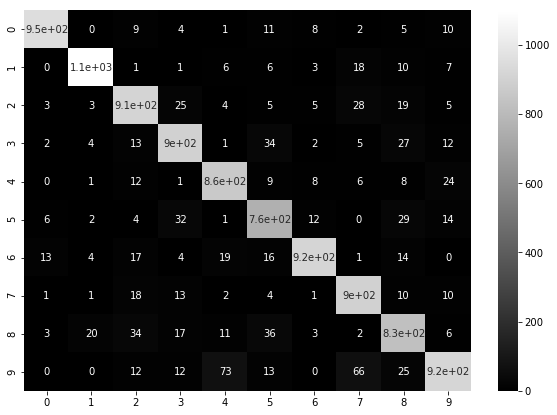

In [92]:
# c_matrix = np.array([[9,1], [0,10]])
# c_matrix = c_matrix[:5, :5]
plt.figure(figsize = (10,7))
sn.heatmap(c_matrix, annot=True, cmap="gray")
plt.show()

In [93]:
c_matrix_norm = c_matrix/np.sum(c_matrix, axis=1)

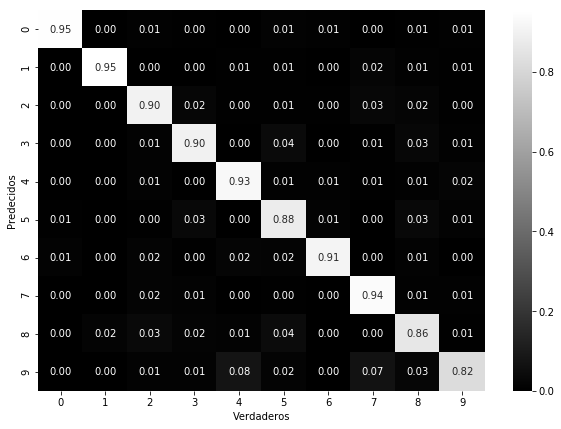

In [94]:
plt.figure(figsize = (10, 7))
sn.heatmap(c_matrix_norm, annot=True, cmap="gray", fmt='.2f')
plt.xlabel("Verdaderos")
plt.ylabel("Predecidos")

plt.show()

In [95]:
num = np.array([[1,3,0],[0,5,0]])

In [96]:
np.sum(num, axis=1)

array([4, 5])

In [97]:
x, y = mnist.test.next_batch(mnist.test.num_examples)

In [98]:
np.sum(x, axis = 1)

array([ 154.51373291,  160.63137817,   83.25883484, ...,  110.56079102,
         86.77255249,   69.96470642], dtype=float32)

In [99]:
type(tst)

numpy.ndarray

In [100]:
tst.argmax()

0

In [101]:
tst[tst==1]

array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32)

In [102]:
tst.shape

(10000,)

In [103]:
np.sum(tst)

9051.0

In [104]:
tst[0]

1.0

In [105]:
tst[1]

1.0

In [106]:
tst[tst==1.0].shape

(9051,)

In [107]:
tst[0]

1.0

In [108]:
tst[1]

1.0

In [109]:
np.unique(tst2)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

[]

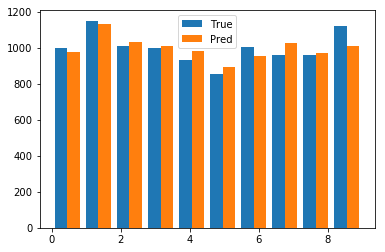

In [110]:
plt.hist(tst2)
plt.legend(['True', 'Pred'])
plt.plot()

In [111]:
numIdx = np.arange(10000)

In [112]:
N1 = tst2[0]
N2 = tst2[1]

In [113]:
invalid = N1!=N2

In [114]:
sum(invalid)

949

 6 - 5
 6 - 4
 3 - 1
 2 - 3
 7 - 2
 9 - 7
 1 - 7
 4 - 7
 9 - 2
 3 - 9
 5 - 6
 7 - 8
 8 - 9
 6 - 3
 6 - 4
 0 - 6
 1 - 5
 4 - 8
 1 - 4
 9 - 7


/home/diego/.local/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 5 - 3
 3 - 2
 1 - 9
 7 - 2
 9 - 4
 3 - 5
 4 - 6
 7 - 3
 0 - 5
 7 - 2
 7 - 3
 9 - 8
 7 - 8
 8 - 2
 0 - 6
 8 - 9
 5 - 3
 7 - 3
 9 - 7
 8 - 5
 3 - 9
 0 - 5
 2 - 8
 3 - 5
 5 - 3
 8 - 4
 5 - 3
 6 - 3
 2 - 8
 3 - 8
 9 - 7
 1 - 7
 6 - 8
 9 - 4
 5 - 3
 9 - 4
 8 - 3
 2 - 8
 3 - 8
 9 - 7
 3 - 8
 6 - 4
 8 - 2
 8 - 1
 4 - 9
 9 - 3
 6 - 2
 7 - 5
 0 - 7
 9 - 2
 1 - 7
 2 - 7
 9 - 7
 4 - 8
 9 - 4
 5 - 8
 6 - 0
 8 - 5
 8 - 2
 8 - 2
 9 - 4
 8 - 2
 9 - 4
 9 - 5
 5 - 8
 3 - 8
 7 - 8
 9 - 7
 3 - 5
 2 - 8
 9 - 4
 2 - 7
 3 - 1
 7 - 2
 1 - 7
 5 - 3
 0 - 2
 8 - 3
 9 - 8
 2 - 7
 6 - 1
 5 - 4
 0 - 6
 3 - 2
 8 - 3
 9 - 8


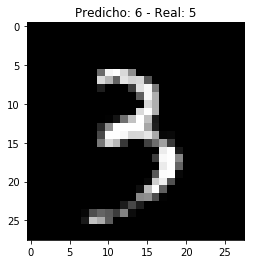

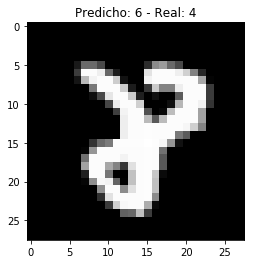

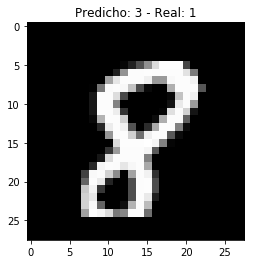

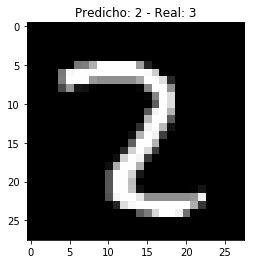

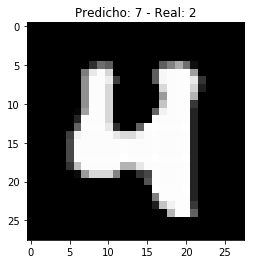

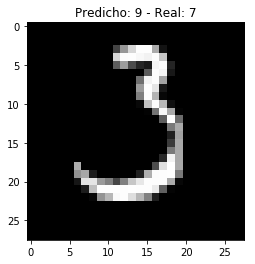

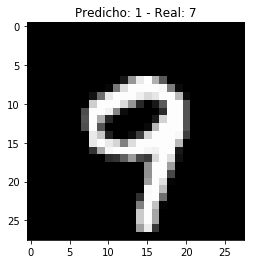

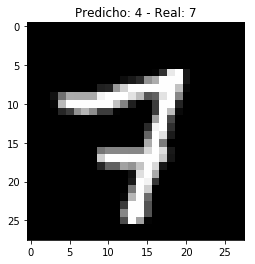

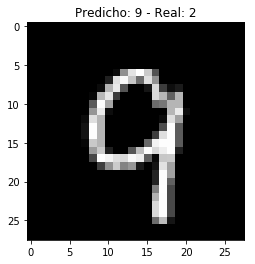

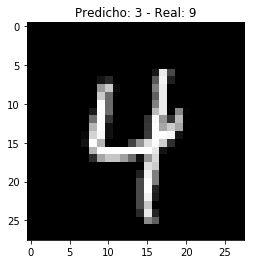

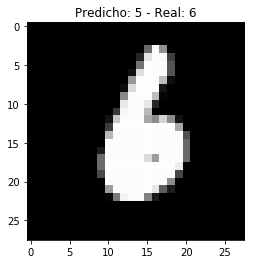

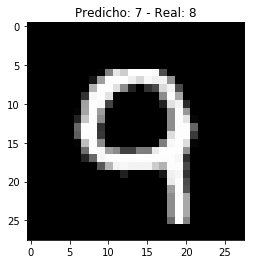

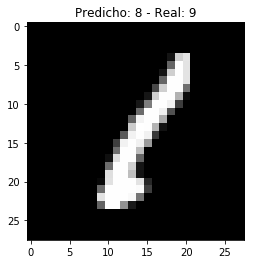

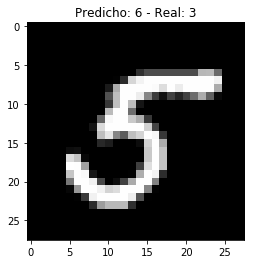

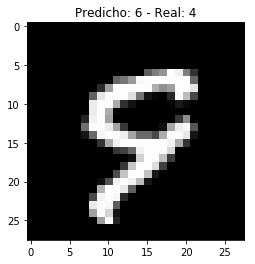

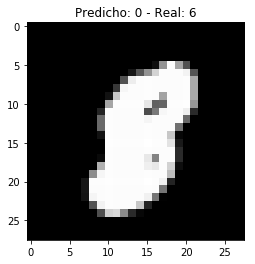

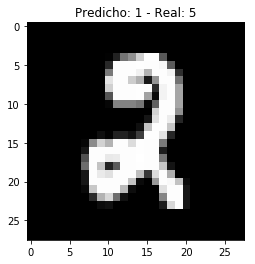

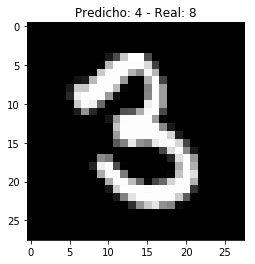

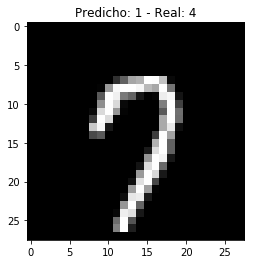

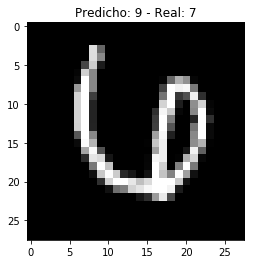

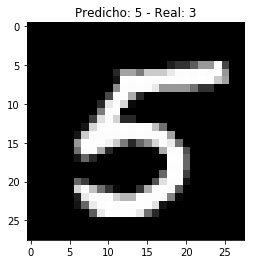

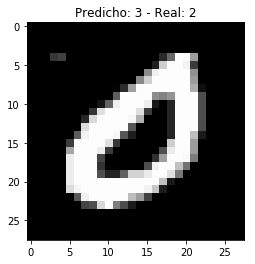

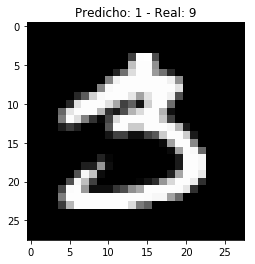

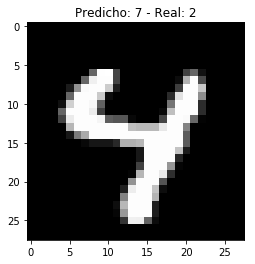

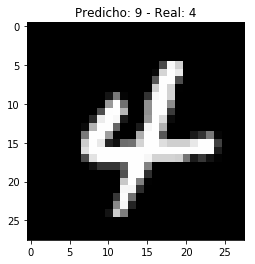

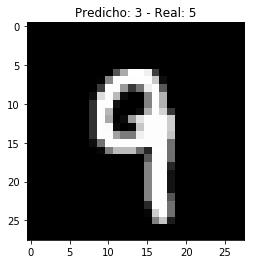

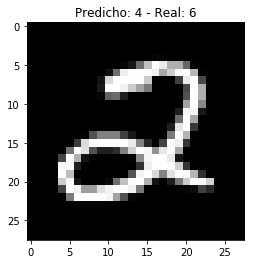

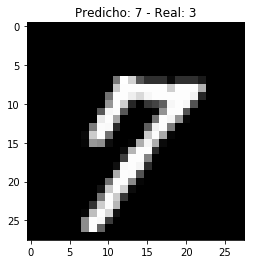

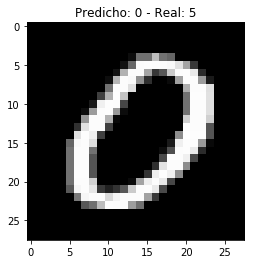

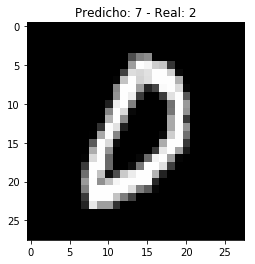

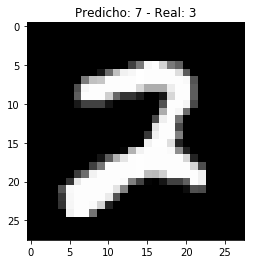

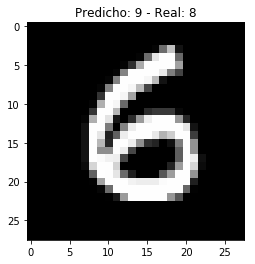

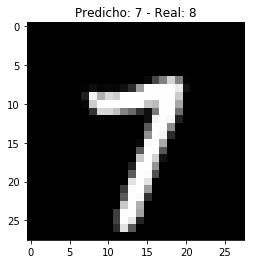

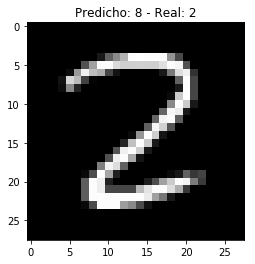

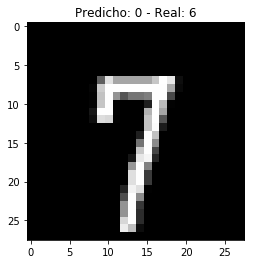

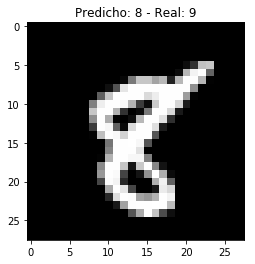

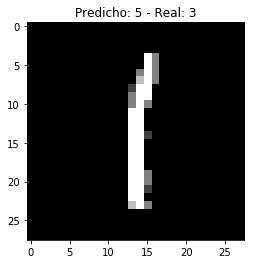

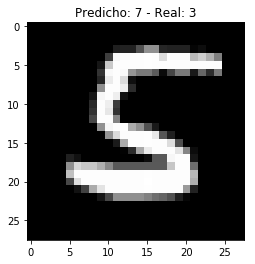

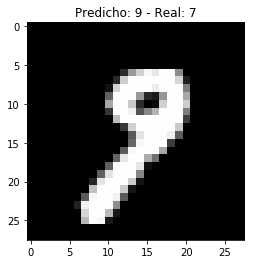

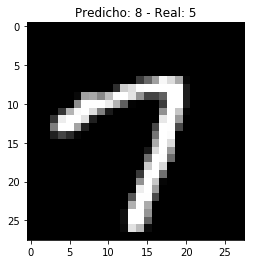

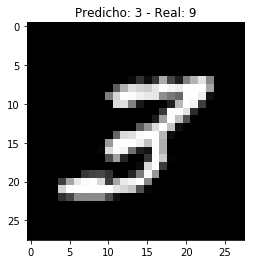

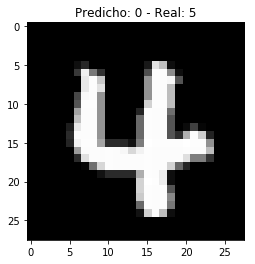

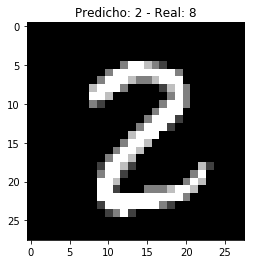

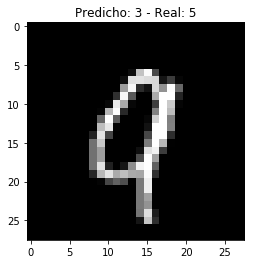

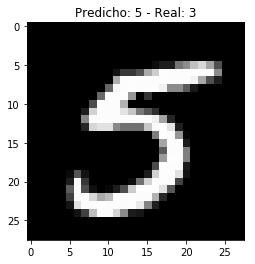

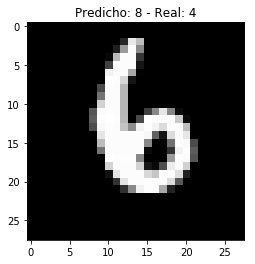

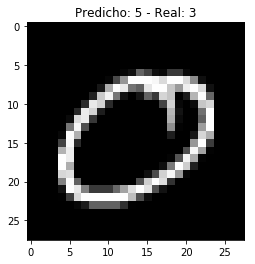

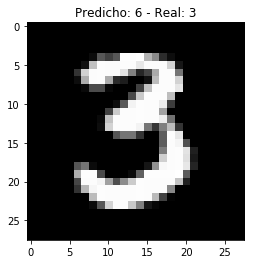

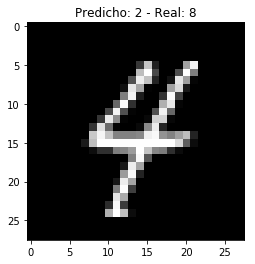

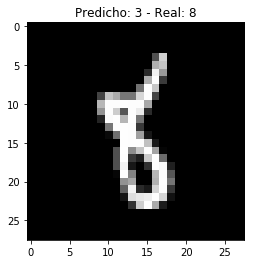

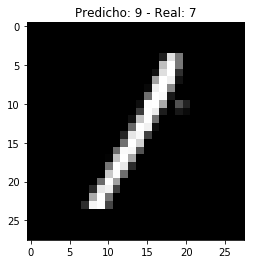

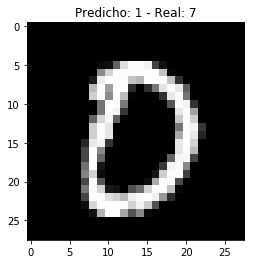

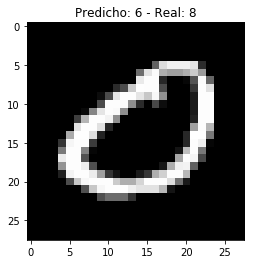

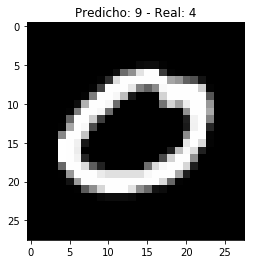

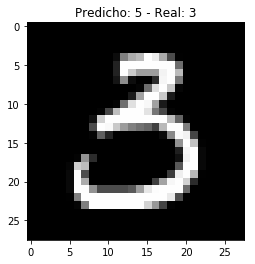

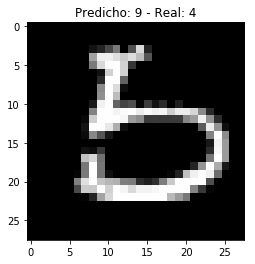

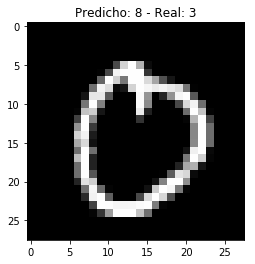

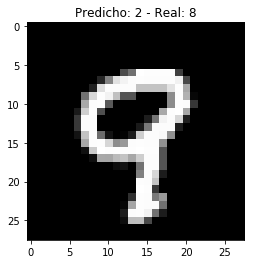

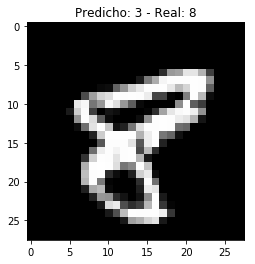

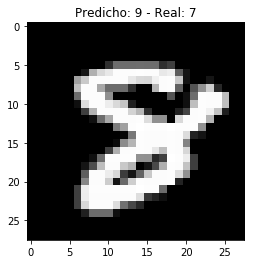

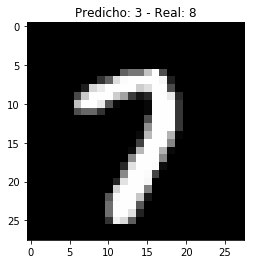

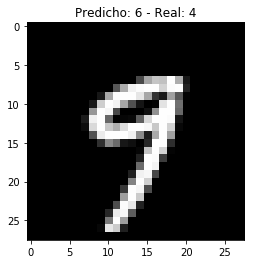

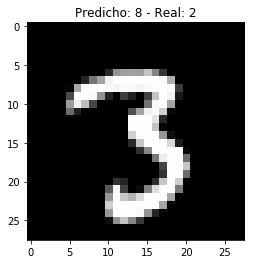

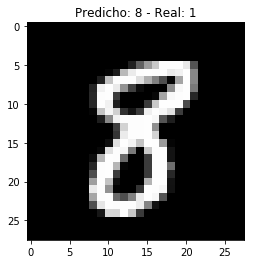

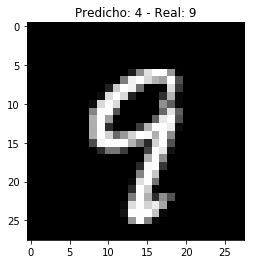

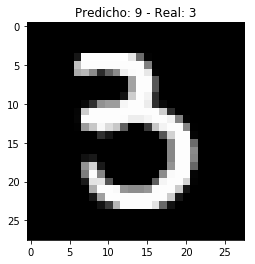

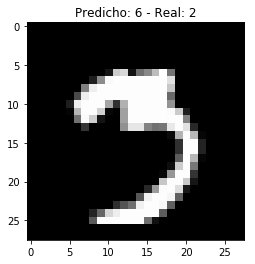

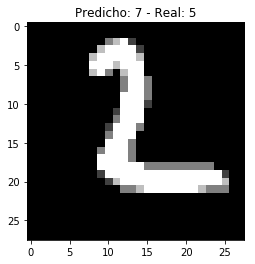

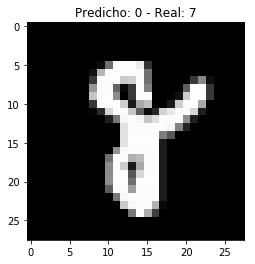

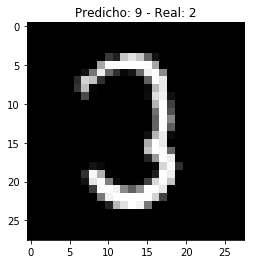

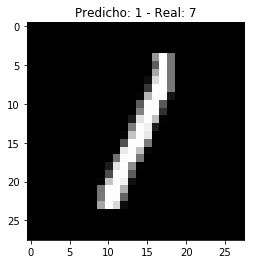

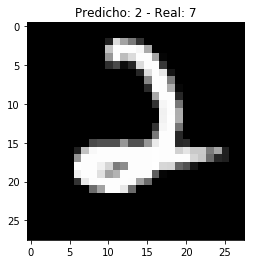

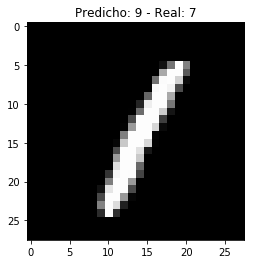

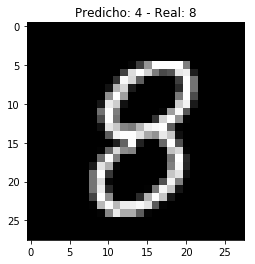

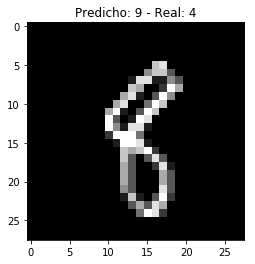

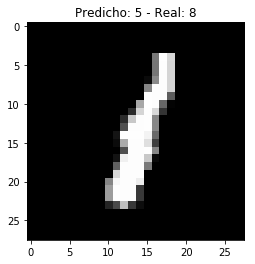

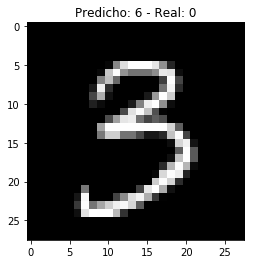

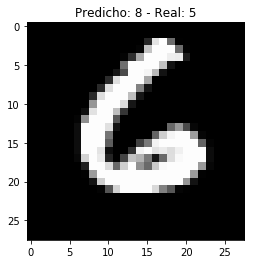

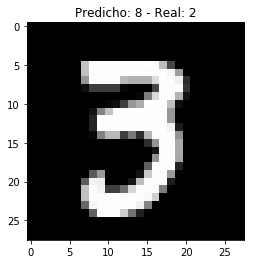

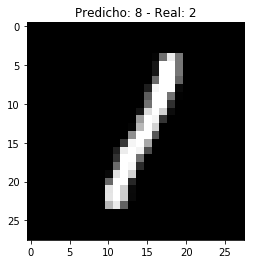

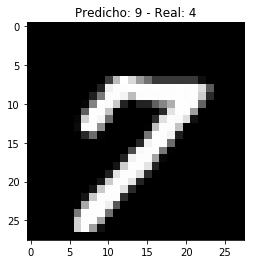

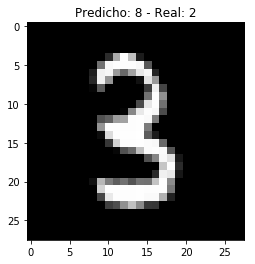

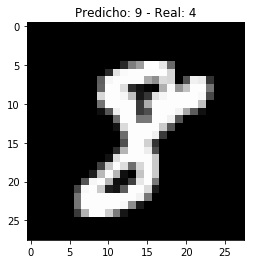

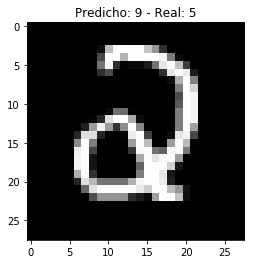

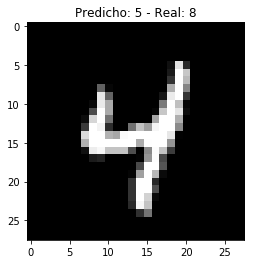

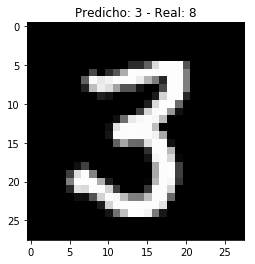

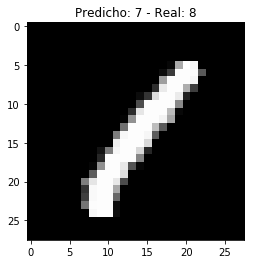

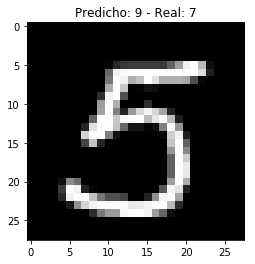

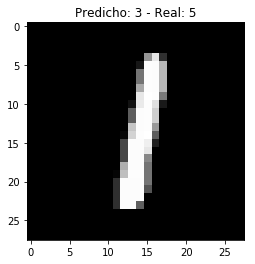

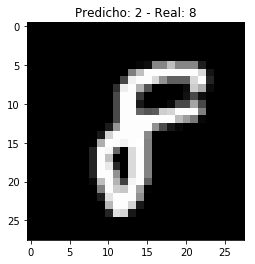

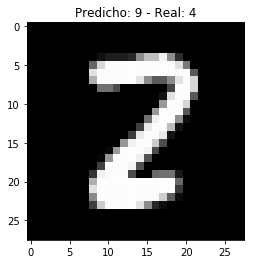

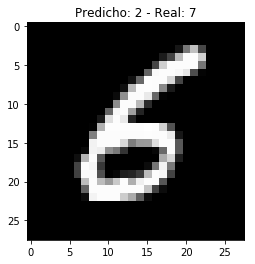

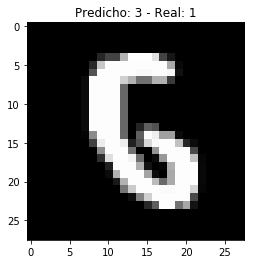

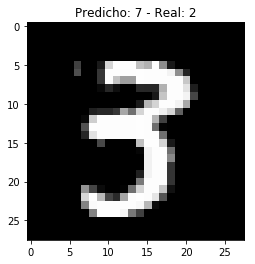

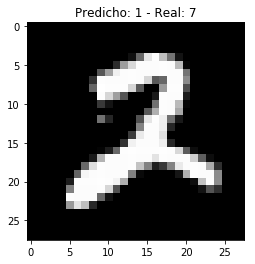

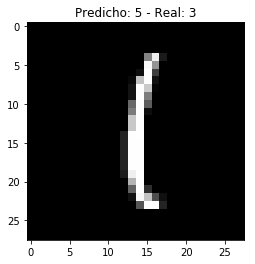

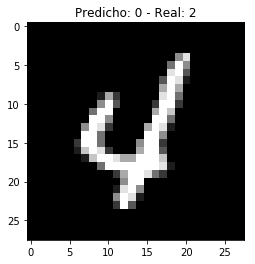

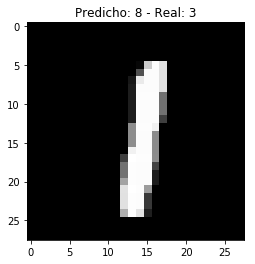

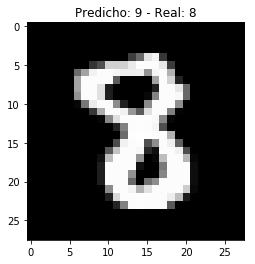

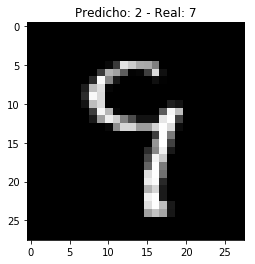

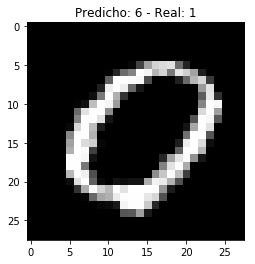

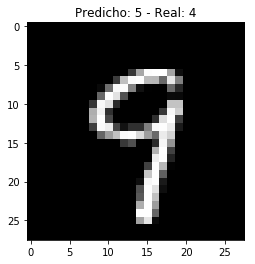

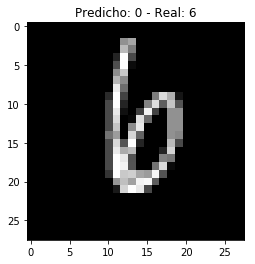

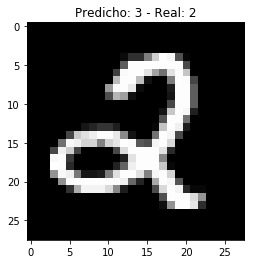

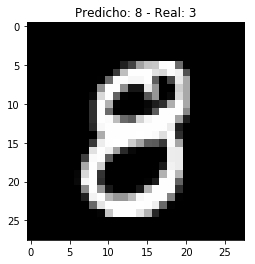

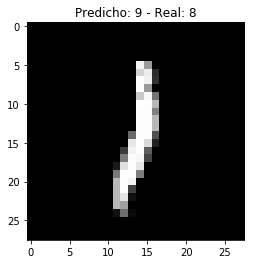

In [115]:
for idx in np.extract(invalid, numIdx):
    if idx>1000:
        continue
    imagen = mnist.test.images[idx].reshape(28,28)
    plt.figure()
    plt.imshow(imagen, cmap='gist_gray')
    print(" " + str(N1[idx]) + " - " + str(N2[idx]))
    plt.title("Predicho: " + str(N1[idx]) + " - Real: " + str(N2[idx]))
    #print()